In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score,recall_score
from sklearn.model_selection import cross_val_score,train_test_split,StratifiedKFold,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [2]:
train = pd.read_csv('/kaggle/input/novartis/Dataset/train.csv')
test = pd.read_csv('/kaggle/input/novartis/Dataset/test.csv')
sub = pd.read_csv('/kaggle/input/novartis/Dataset/sample_submission.csv')

In [3]:
train.head(5)

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [4]:
len(train)

23856

In [5]:
train.dtypes

INCIDENT_ID          object
DATE                 object
X_1                   int64
X_2                   int64
X_3                   int64
X_4                   int64
X_5                   int64
X_6                   int64
X_7                   int64
X_8                   int64
X_9                   int64
X_10                  int64
X_11                  int64
X_12                float64
X_13                  int64
X_14                  int64
X_15                  int64
MULTIPLE_OFFENSE      int64
dtype: object

In [6]:
train['DATE'] = pd.to_datetime(train['DATE']) #Converting date to type of datetime

In [7]:
train.isnull().sum() #checking for missing values

INCIDENT_ID           0
DATE                  0
X_1                   0
X_2                   0
X_3                   0
X_4                   0
X_5                   0
X_6                   0
X_7                   0
X_8                   0
X_9                   0
X_10                  0
X_11                  0
X_12                182
X_13                  0
X_14                  0
X_15                  0
MULTIPLE_OFFENSE      0
dtype: int64

In [8]:
pd.value_counts(train['X_12'])

1.0     15674
0.0      5171
2.0      2039
3.0       476
4.0       176
5.0        59
6.0        36
8.0         9
10.0        7
9.0         6
7.0         4
11.0        4
15.0        2
20.0        2
50.0        1
30.0        1
14.0        1
17.0        1
40.0        1
90.0        1
12.0        1
16.0        1
58.0        1
Name: X_12, dtype: int64

In [9]:
train['X_12'].isnull().sum()

182

In [10]:
import seaborn as sns

C:\Users\jsaik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='X_12', ylabel='count'>

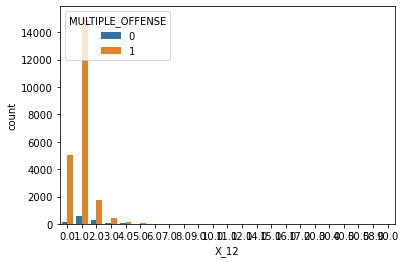

In [11]:
sns.countplot('X_12',hue='MULTIPLE_OFFENSE',data=train)

In [12]:
x_12_1 = train[train['MULTIPLE_OFFENSE']==1].X_12

In [13]:
x_12_1.isnull().sum()

182

In [14]:
np.mean(x_12_1)

0.9453684862425905

In [15]:
train['X_12'].fillna(1,inplace=True) #replacing missing values with 1 as most of the values are 1

In [16]:
train.isnull().sum()

INCIDENT_ID         0
DATE                0
X_1                 0
X_2                 0
X_3                 0
X_4                 0
X_5                 0
X_6                 0
X_7                 0
X_8                 0
X_9                 0
X_10                0
X_11                0
X_12                0
X_13                0
X_14                0
X_15                0
MULTIPLE_OFFENSE    0
dtype: int64

In [17]:
train['X_12'] = train['X_12'].astype('int64') #converting to int64

In [18]:
train.dtypes

INCIDENT_ID                 object
DATE                datetime64[ns]
X_1                          int64
X_2                          int64
X_3                          int64
X_4                          int64
X_5                          int64
X_6                          int64
X_7                          int64
X_8                          int64
X_9                          int64
X_10                         int64
X_11                         int64
X_12                         int64
X_13                         int64
X_14                         int64
X_15                         int64
MULTIPLE_OFFENSE             int64
dtype: object

In [19]:
train_t = train.drop('INCIDENT_ID',axis=1)

In [20]:
train_t.head(5)

,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,2004-07-04,0,36,34,2,1,5,6,1,6,1,174,1,92,29,36,0
1,2017-07-18,1,37,37,0,0,11,17,1,6,1,236,1,103,142,34,1
2,2017-03-15,0,3,2,3,5,1,0,2,3,1,174,1,110,93,34,1
3,2009-02-13,0,33,32,2,1,7,1,1,6,1,249,1,72,29,34,1
4,2005-04-13,0,33,32,2,1,8,3,0,5,1,174,0,112,29,43,1


In [21]:
X = train_t.iloc[:,0:-1]
y = train_t.iloc[:,-1]

In [22]:
#Creating separate columns for year,month, and day

In [23]:
X['YEAR'] = X.DATE.dt.year 
X['MONTH'] = X.DATE.dt.month
X['DAY'] = X.DATE.dt.day

In [24]:
X = X.drop('DATE',axis=1)

In [25]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 0
                                                    )

In [26]:
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))

In [27]:
kfold = StratifiedKFold(n_splits=10)

In [28]:
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y_train , scoring = "recall", cv = kfold, n_jobs=4))


In [29]:
cv_results

[array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1.        , 0.99937304, 0.99937304, 0.99811912, 0.99623588,
        0.99937265, 0.99811794, 1.        , 0.99874529, 0.99874529]),
 array([1.        , 0.99937304, 0.99937304, 0.99874608, 0.99623588,
        0.99937265, 0.99811794, 1.        , 0.99811794, 0.99874529]),
 array([1.        , 0.99811912, 0.99874608, 0.99874608, 0.99623588,
        1.        , 0.99749059, 0.99937265, 0.99874529, 0.99874529]),
 array([0.99937304, 0.99874608, 0.99937304, 1.        , 0.99937265,
        1.        , 0.99937265, 0.99937265, 0.99937265, 0.99937265]),
 array([1.        , 1.        , 1.        , 0.99937304, 0.99874529,
        1.        , 0.99937265, 1.        , 0.99937265, 0.99937265])]

In [30]:
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [31]:
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting"]})

In [32]:
cv_res

,CrossValMeans,CrossValerrors,Algorithm
0,1.000000,0.000000,SVC
1,0.998808,0.001066,DecisionTree
2,0.998808,0.001067,AdaBoost
3,0.998620,0.001079,RandomForest
4,0.999436,0.000338,ExtraTrees
5,0.999624,0.000416,GradientBoosting


In [33]:
test.head(5)

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,CR_195453,01-FEB-18,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23
1,CR_103520,05-MAR-04,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,CR_196089,27-JAN-18,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,CR_112195,18-AUG-06,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,CR_149832,31-OCT-11,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43


In [34]:
test['DATE'] = pd.to_datetime(test['DATE'])

In [35]:
test['YEAR'] = test.DATE.dt.year
test['MONTH'] = test.DATE.dt.month
test['DAY'] = test.DATE.dt.day

In [36]:
test['X_12'].fillna(1,inplace=True)

In [37]:
test_t = test.drop('DATE',axis=1)

In [38]:
test['X_12'] = test['X_12'].astype('int64')

In [39]:
test_t['X_12'] = test['X_12']

In [40]:
test_t = test_t.drop('INCIDENT_ID',axis=1)

In [41]:
test_t.head(5)

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,YEAR,MONTH,DAY
0,0,30,35,7,3,6,4,0,5,1,174,1,72,119,23,2018,2,1
1,0,44,44,1,3,7,1,4,6,1,316,0,12,29,34,2004,3,5
2,0,34,33,3,5,2,7,3,0,1,316,1,72,0,34,2018,1,27
3,7,3,2,3,5,9,8,0,5,1,174,1,112,87,34,2006,8,18
4,0,7,8,7,3,2,7,1,5,1,174,0,112,93,43,2011,10,31


In [42]:
gb = GradientBoostingClassifier()
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05],
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "n_estimators":[10]
    }
gbSCV = GridSearchCV(gb,parameters, cv=kfold, scoring="recall", n_jobs= -1, verbose = 1)
gbSCV.fit(X , y)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


NameError: name 'gSVC' is not defined

In [44]:
gbSCV_best = gbSCV.best_estimator_

# Best score
gbSCV.best_score_

1.0

In [45]:
pred3 = gbSCV_best.predict(test_t)

In [46]:
sub1 = sub

In [49]:
sub1 = pd.DataFrame({"INCIDENT_ID":test['INCIDENT_ID'],"MULTIPLE_OFFENSE":pred3})

In [50]:
len(sub1)

15903

In [51]:
sub1.to_csv('sub4.csv',index=False)

In [52]:
pred2 = gbSCV_best.predict(test_t)

In [53]:
sub1 = pd.read_csv('/kaggle/input/novartis/Dataset/sub1.csv')

In [54]:
sub2 = sub1

In [55]:
sub2['MULTIPLE_OFFENSE'] = pred2

In [56]:
sub2.to_csv('sub2.csv',index=False)